In [1]:
#Loading relevant packages
import numpy as np 
import matplotlib.pyplot as plt
import keras
import matplotlib

Using TensorFlow backend.


In [2]:
#Loading the MNIST dataset from keras: the training set and test set contains 60,000 and 10,000 
#28x28 images of 10 classes of handwritten digits respectively 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Total 2s: 5958
Total 5s: 5421
(11379, 28, 28)
(11379,)


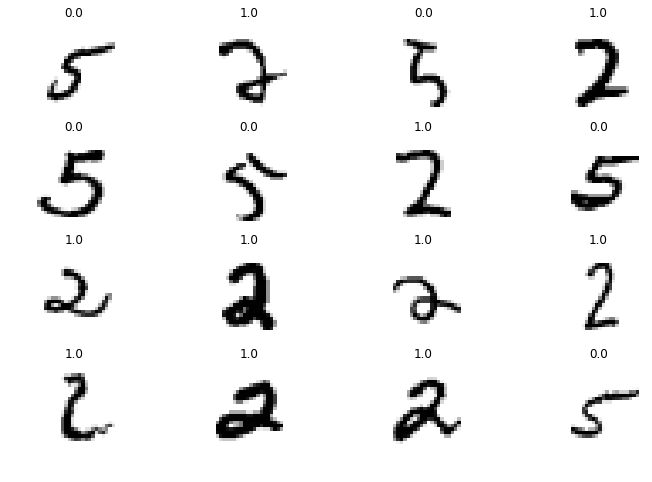

In [84]:
#Choosing 2s and 5s among the training set to train SVMs
digit_2 = (y_train == 2)
X_train_2, y_train_2 = X_train[digit_2], y_train[digit_2]
digit_5 = (y_train == 5)
X_train_5, y_train_5 = X_train[digit_5], y_train[digit_5]
y_train_2 = np.ones(y_train_2.shape)
y_train_5 = np.zeros(y_train_5.shape)
#Casually checking the class balance
print('Total 2s:', X_train_2.shape[0])
print('Total 5s:', X_train_5.shape[0])

#Scale the training set to the range between 0 and 1
X_train_25 = np.concatenate((X_train_2, X_train_5), axis=0)/255
y_train_25 = np.concatenate((y_train_2, y_train_5), axis=0)
print(X_train_25.shape)
print(y_train_25.shape)

#Function to plot some digits of the MNIST data set
def plot_digits(X, y, m, n):
    '''
    Inputs: 
    - X is the data, tensor of Nx28x28
    - y is the label, vector Nx1
    - m is the number of plot row
    - n is the number of plot columns
    
    Outputs: A plot of mxn digits randomly chosen from the input sets
    '''
    ndigits = np.random.choice(a=X.shape[0], size=m*n)
    count = 1
    plt.figure(figsize=(12,8))
    for _ in ndigits:
        plt.subplot(m,n,count)
        im = X[_]
        plt.imshow(im, cmap=matplotlib.cm.binary,
                   interpolation="nearest")
        plt.axis("off")
        plt.title(str(y[_]))
        count += 1
    plt.show()
    
plot_digits(X_train_25,y_train_25, 4, 4)
#Reshaping the data into a 2D tensor
X_train_25 = X_train_25.reshape(X_train_25.shape[0], 28*28)

In [41]:
#Choosing 2s and 5s among the test set, and reshaping to 2D tensor
digit_2 = (y_test == 2)
X_test_2, y_test_2 = X_test[digit_2], y_test[digit_2]
digit_5 = (y_test == 5)
X_test_5, y_test_5 = X_test[digit_5], y_test[digit_5]
y_test_2 = np.ones(y_test_2.shape)
y_test_5 = np.zeros(y_test_5.shape)

print('Total 2s:', X_test_2.shape[0])
print('Total 5s:', X_test_5.shape[0])

X_test_25 = np.concatenate((X_test_2, X_test_5), axis=0)/255
y_test_25 = np.concatenate((y_test_2, y_test_5), axis=0)

print(X_test_25.shape)
print(y_test_25.shape)
X_test_25 = X_test_25.reshape(X_test_25.shape[0], 28*28)

Total 2s: 1032
Total 5s: 892
(1924, 28, 28)
(1924,)


In [42]:
#Using Scikit-learn implemented SVC and LinearSVC
from sklearn.svm import SVC, LinearSVC
import time

#Initiating LinearSVC with l2 regularization, dual=False to solve only the primal problem because
#n_feature < n_datapoint (28x28 < 60,000) makes dual problem optimizer slower in liblinear implementation
#(Training time doubles if dual=True, at around 0.5s)
linear_1 = LinearSVC(penalty='l2', C=1.0, dual=False)

#Fitting the 2s and 5s dataset, evaluating the accuracy on test and training set
start = time.time()
linear_1.fit(X_train_25, y_train_25)
print('Training time for LinearSVC:', time.time()-start)
print('Accuracy on train set for LinearSVC:', linear_1.score(X_train_25, y_train_25))
print('Accuracy on test set for LinearSVC:', linear_1.score(X_test_25, y_test_25))

#Initiating SVC class, with soft-margin SVC (C=1.0) and linear kernel
linear_2 = SVC(kernel='linear', C=1.0)

#Fitting the 2s and 5s dataset, evaluating the accuracy on test and training set
start = time.time()
linear_2.fit(X_train_25, y_train_25)
print('Training time for SVC, with linear kernel:', time.time()-start)
print('Accuracy on train set for SVC, with linear kernel:', linear_2.score(X_train_25, y_train_25))
print('Accuracy on test set for SVC, with linear kernel:', linear_2.score(X_test_25, y_test_25))

Training time for LinearSVC: 0.3498690128326416
Accuracy on train set for LinearSVC: 0.9954301783988048
Accuracy on test set for LinearSVC: 0.9823284823284824
Training time for SVC, with linear kernel: 11.900015830993652
Accuracy on train set for SVC, with linear kernel: 0.9923543369364619
Accuracy on test set for SVC, with linear kernel: 0.9838877338877339


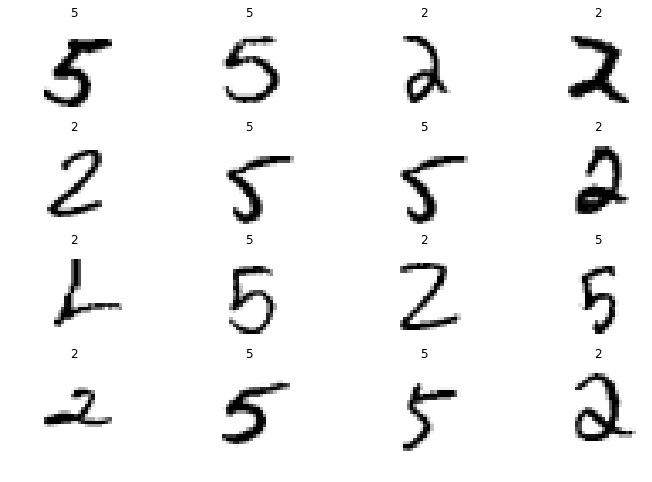

In [54]:
wrongs = y_test_25 == linear_1.predict(X_test_25)

def plot_wrong(X, y, m, n):
    ndigits = np.random.choice(a=X.shape[0], size=m*n)
    count = 1
    plt.figure(figsize=(12,8))
    for _ in ndigits:
        plt.subplot(m,n,count)
        im = X[_].reshape(28,28)
        plt.imshow(im, cmap=matplotlib.cm.binary,
                   interpolation="nearest")
        plt.axis("off")
        if y[_] == 1: 
            dumb = 2
        else: dumb = 5
        plt.title(str(dumb))
        count += 1
    plt.show()
plot_wrong(X_test_25[wrongs], y_test_25[wrongs], 4,4)

Accuracy on train set 1.0


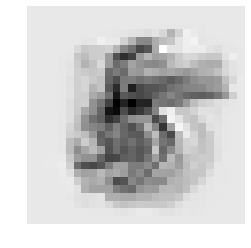

In [83]:
X_train_noise = np.abs(np.random.normal(size=X_train_2.shape))
y_train_noise = np.zeros(y_train_2.shape)
y_train_5 = np.ones(y_train_5.shape)
X_train_5noise = np.concatenate((X_train_5, X_train_noise), axis=0)/255
y_train_5noise = np.concatenate((y_train_5, y_train_noise), axis=0)
X_train_5noise = X_train_5noise.reshape(X_train_5noise.shape[0], 28*28)

linear = LinearSVC(penalty='l2', C=1.0, dual=False)

linear.fit(X_train_5noise, y_train_5noise)
print('Accuracy on train set', linear.score(X_train_5noise, y_train_5noise))

lala = linear.coef_
im = lala.reshape(28,28)
plt.imshow(im, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

Accuracy on train set 1.0


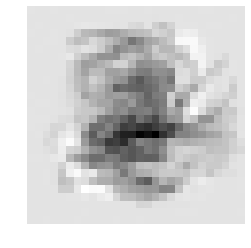

In [90]:
X_train_noise = np.abs(np.random.normal(size=X_train_5.shape))
y_train_noise = np.zeros(y_train_5.shape)
X_train_2noise = np.concatenate((X_train_2, X_train_noise), axis=0)/255
y_train_2noise = np.concatenate((y_train_2, y_train_noise), axis=0)
X_train_2noise = X_train_2noise.reshape(X_train_2noise.shape[0], 28*28)

linear = LinearSVC(penalty='l2', C=1.0, dual=False)

linear.fit(X_train_2noise, y_train_2noise)
print('Accuracy on train set', linear.score(X_train_2noise, y_train_2noise))

lala = linear.coef_
im = lala.reshape(28,28)
plt.imshow(im, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

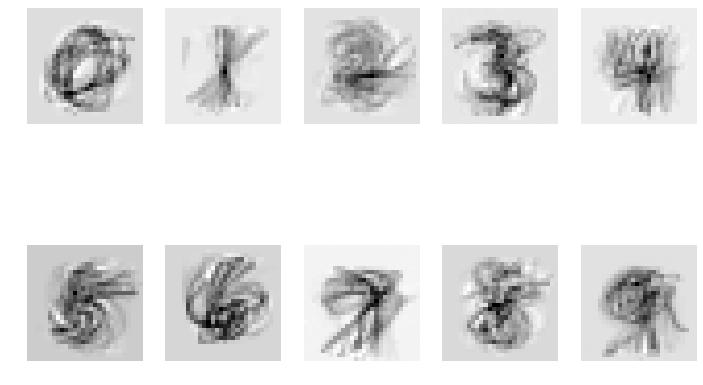

In [101]:
plt.figure(figsize=(12,8))
for _ in range(0,10):
    digit_1 = (y_train == _)
    X_train_1, y_train_1 = X_train[digit_1], y_train[digit_1]
    y_train_1 = np.ones(y_train_1.shape)

    X_train_noise = np.abs(np.random.normal(size=X_train_5.shape))
    y_train_noise = np.zeros(y_train_5.shape)
    X_train_1noise = np.concatenate((X_train_1, X_train_noise), axis=0)/255
    y_train_1noise = np.concatenate((y_train_1, y_train_noise), axis=0)
    X_train_1noise = X_train_1noise.reshape(X_train_1noise.shape[0], 28*28)

    linear = LinearSVC(penalty='l2', C=1.0, dual=False)
    linear.fit(X_train_1noise, y_train_1noise)
    lala = linear.coef_
    plt.subplot(5,2,_+1)
    im = lala.reshape(28,28)
    plt.imshow(im, cmap=matplotlib.cm.binary)
    plt.axis("off")

plt.show()

In [13]:
#Initiating the SVC, with soft-margin SVC (C=1.0) and quadratic kernel, and automatic gamma
poly_quad = SVC(kernel='poly', C=1.0, degree=2, gamma='scale')

start = time.time()
poly_quad.fit(X_train_25, y_train_25)
print('Training time for SVC, with polynomial 2 kernel:', time.time()-start)
print('Accuracy on train set for SVC, with polynomial 2 kernel:', poly_quad.score(X_train_25, y_train_25))
print('Accuracy on test set for SVC, with polynomial 2 kernel:', poly_quad.score(X_test_25, y_test_25))

#Initiating the SVC, with soft-margin SVC (C=1.0) and cubic kernel, and automatic gamma
poly_cube = SVC(kernel='poly', C=1.0, degree=3, gamma='scale')

start = time.time()
poly_cube.fit(X_train_25, y_train_25)
print('Training time for SVC, with polynomial 3 kernel:', time.time()-start)
print('Accuracy on train set for SVC, with polynomial 3 kernel:', poly_cube.score(X_train_25, y_train_25))
print('Accuracy on test set for SVC, with polynomial 3 kernel:', poly_cube.score(X_test_25, y_test_25))

Training time for SVC, with polynomial 2 kernel: 21.592259168624878
Accuracy on train set for SVC, with polynomial 2 kernel: 0.9920028121979084
Accuracy on test set for SVC, with polynomial 2 kernel: 0.9922037422037422
Training time for SVC, with polynomial 3 kernel: 43.53636693954468
Accuracy on train set for SVC, with polynomial 3 kernel: 0.9757447930398102
Accuracy on test set for SVC, with polynomial 3 kernel: 0.974012474012474


In [15]:
#Initiating SVC class, with soft-margin SVC (C=1.0) and gaussian kernel
gau_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

start = time.time()
gau_rbf.fit(X_train_25, y_train_25)
print('Training time for SVC, with Gaussian kernel:', time.time()-start)
print('Accuracy on train set for SVC, with Gaussian kernel:', gau_rbf.score(X_train_25, y_train_25))
print('Accuracy on test set for SVC, with Gaussian kernel:', gau_rbf.score(X_test_25, y_test_25))

Training time for SVC, with Gaussian kernel: 13.312834024429321
Accuracy on train set for SVC, with Gaussian kernel: 0.9935846735213991
Accuracy on test set for SVC, with Gaussian kernel: 0.9927234927234927


In [16]:
#Soft-margin weighting: testing 198 different weigthtings for margin violations
cs = np.arange(1,100,0.5)
times, accs_train, accs_test = [], [], []

for _ in cs: 
    linear_cs = LinearSVC(penalty='l2', C=_, dual=False)
    start = time.time()
    linear_cs.fit(X_train_25, y_train_25)
    times.append(time.time()-start)
    accs_test.append(linear_cs.score(X_test_25, y_test_25))
    accs_train.append(linear_cs.score(X_train_25, y_train_25))

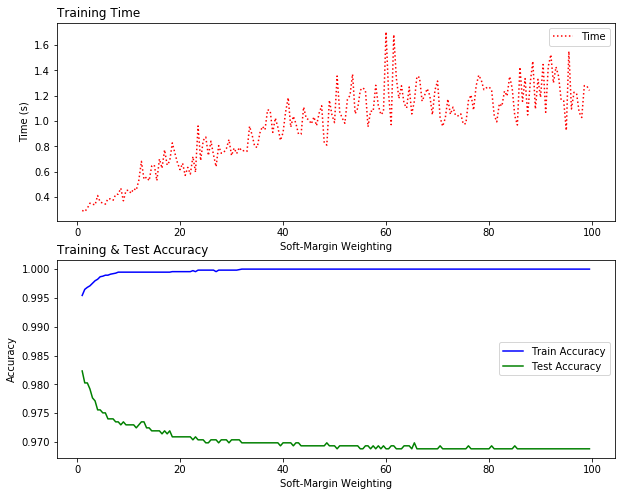

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(cs, times, linestyle=':', color='r', label='Time')
plt.legend()
plt.title('Training Time', loc='left')
plt.xlabel('Soft-Margin Weighting')
plt.ylabel('Time (s)')
plt.subplot(2,1,2)
plt.plot(cs, accs_train, color='b', label='Train Accuracy')
plt.plot(cs, accs_test, color='g', label='Test Accuracy')
plt.legend()
plt.title('Training & Test Accuracy', loc='left')
plt.xlabel('Soft-Margin Weighting')
plt.ylabel('Accuracy')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)
reg.fit(X_train_25, y_train_25)
print(reg.score(X_train_25, y_train_25))
print(reg.score(X_test_25, y_test_25))

0.9834783372879866
0.9807692307692307
